# Inflation and Inflation Expectation

Comparing the US inflation with inflation expectation, I use data provided by FRED API. To retrieve data, the package [fredeco](https://pypi.org/project/fredeco/) is used.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from fredeco.fredData import fred_series, fred_multi_series, explore   # fredeco can be installed with pip
from fredeco.fredSearch import fred_list_series, fred_info_series, fred_search, fred_vintagedates

In [3]:
df_price=fred_multi_series(fred_api=myfred_api,series=['CPIAUCNS',      # US consummer price index
                                              'MICH'],frequency='m')    # Inflation expectations

In [4]:
df_price.index=pd.to_datetime(df_price.index.tolist(),format='%Y-%m-%d') # convert date values to dateime type
df_price.tail(5)

,CPIAUCNS,MICH
2023-04-01,303.363,4.6
2023-05-01,304.127,4.2
2023-06-01,305.109,3.3
2023-07-01,305.691,3.4
2023-08-01,307.026,NaN


In [5]:
# create two variables of mean values, rolling through 12 months
df_price['CPI_rol12']=(df_price.CPIAUCNS.pct_change(12)*100).rolling(12).mean()
df_price['MICH_rol12']=df_price.MICH.rolling(12).mean()                   
df_price.tail(4)

,CPIAUCNS,MICH,CPI_rol12,MICH_rol12
2023-05-01,304.127,4.2,6.813979,4.558333
2023-06-01,305.109,3.3,6.306431,4.391667
2023-07-01,305.691,3.4,5.860845,4.241667
2023-08-01,307.026,NaN,5.477713,NaN


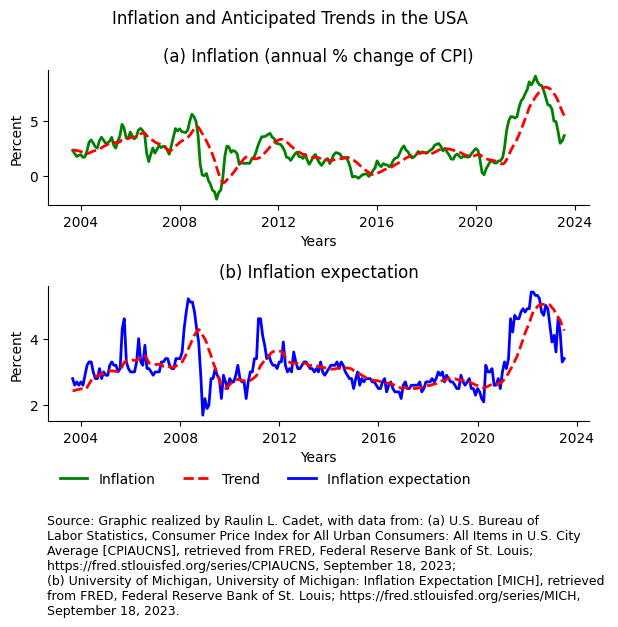

In [6]:
fig,ax=plt.subplots(2,1)

ax[0].plot((df_price['CPIAUCNS'].pct_change(12)*100).tail(240),label='Inflation',color='green',linewidth=2)
ax[0].plot(df_price['CPI_rol12'].tail(240),label='Trend',color='red',linestyle='dashed',linewidth=2)
ax[1].plot(df_price['MICH'].tail(240),label='Inflation expectation',color='blue',linewidth=2)
ax[1].plot(df_price['MICH_rol12'].tail(240),color='red',linestyle='dashed',linewidth=2)
ax[0].set_xlabel('Years')
ax[1].set_xlabel('Years')
ax[0].set_ylabel('Percent')
ax[1].set_ylabel('Percent')
ax[0].set_title('(a) Inflation (annual % change of CPI)')
ax[1].set_title('(b) Inflation expectation')
fig.text(0.12, -0.28, 'Source: Graphic realized by Raulin L. Cadet, with data from: (a) U.S. Bureau of \nLabor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City \nAverage [CPIAUCNS], retrieved from FRED, Federal Reserve Bank of St. Louis; \nhttps://fred.stlouisfed.org/series/CPIAUCNS, September 18, 2023; \n(b) University of Michigan, University of Michigan: Inflation Expectation [MICH], retrieved \nfrom FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MICH, \nSeptember 18, 2023.',  
 ha='left',fontsize=9)
fig.legend(ncol=3,loc='lower left',frameon=False,bbox_to_anchor=(0.12,-0.04))  # to add legend, without frame
ax[0].spines[['right', 'top']].set_visible(False)                              # to remove top and right spines
ax[1].spines[['right', 'top']].set_visible(False)                              # to remove top and right spines
plt.subplots_adjust(hspace=0.5)                                                # Increase the horizontal space between subplots
fig.suptitle('Inflation and Anticipated Trends in the USA')
plt.tight_layout()

In [169]:
# information related to both indicators CPI and inflation expectation
fred_info_series(fred_api=myfred_api,series='CPIAUCNS'),fred_info_series(fred_api=myfred_api,series='MICH')

({'realtime_start': '2023-09-18',
  'realtime_end': '2023-09-18',
  'seriess': [{'id': 'CPIAUCNS',
    'realtime_start': '2023-09-18',
    'realtime_end': '2023-09-18',
    'title': 'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average',
    'observation_start': '1913-01-01',
    'observation_end': '2023-08-01',
    'frequency': 'Monthly',
    'frequency_short': 'M',
    'units': 'Index 1982-1984=100',
    'units_short': 'Index 1982-1984=100',
    'seasonal_adjustment': 'Not Seasonally Adjusted',
    'seasonal_adjustment_short': 'NSA',
    'last_updated': '2023-09-13 07:42:02-05',
    'popularity': 73,
    'notes': 'Handbook of Methods (https://www.bls.gov/opub/hom/pdf/cpihom.pdf)\nUnderstanding the CPI: Frequently Asked Questions (https://www.bls.gov/cpi/questions-and-answers.htm)'}]},
 {'realtime_start': '2023-09-18',
  'realtime_end': '2023-09-18',
  'seriess': [{'id': 'MICH',
    'realtime_start': '2023-09-18',
    'realtime_end': '2023-09-18',
    'title': 